(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se            

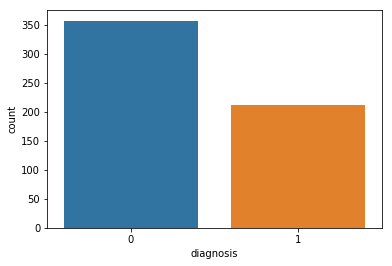

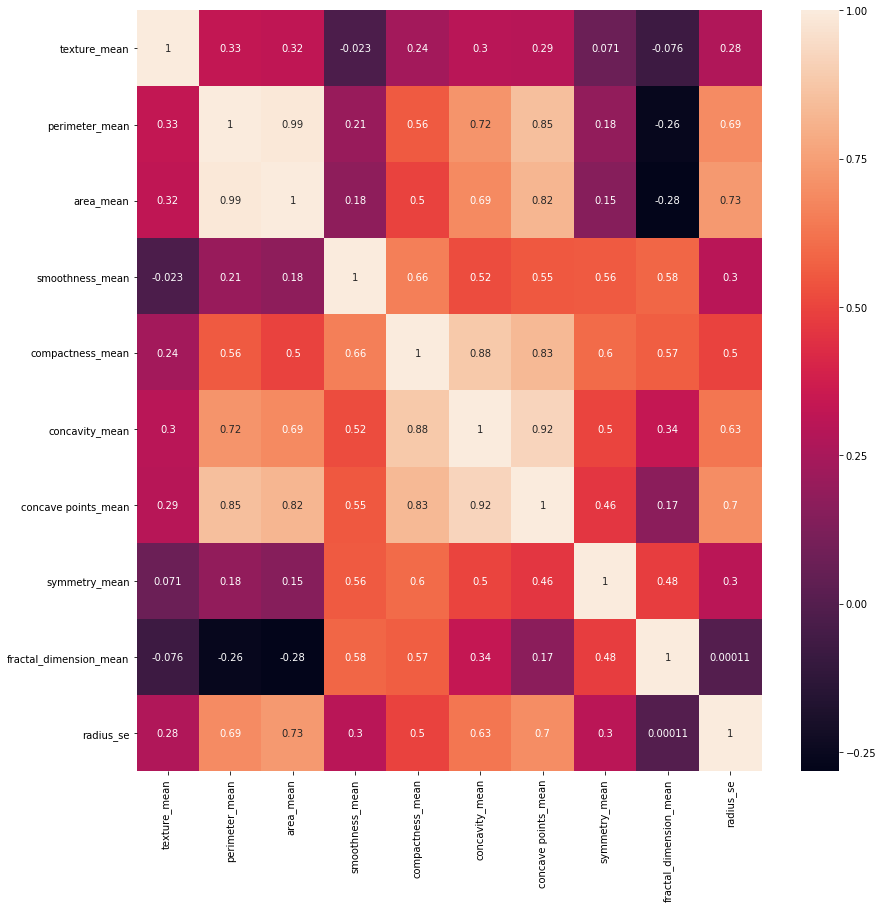

SVM模型的预测准确率为：0.9240


In [25]:
# 1.加载数据集
import pandas as pd
data = pd.read_csv('breast_cancer_data-master/data.csv')

# 2.数据探索
# 1）查看数据完整度
print(data.shape)
print(data.info())
# 2)查看特征及前几行数据
print(data.columns)
print(data.head())
# 3）查看标签特征diagnosis的值及个数
print(data['diagnosis'].value_counts())
print(data.diagnosis.value_counts())
print('*'*100)

# 3.数据清洗
# 1）删去id字段
data.drop('id', axis=1, inplace=True)
# 2）将diagnosis做映射，良性"B"为0，恶性"M"为1
data['diagnosis'] = data['diagnosis'].map({'B':0, 'M':1})
# 3）将其它特征分成三个组别
mean_features = list(data.columns)[2:12]
se_features = list(data.columns)[12:22]
worst_features = list(data.columns)[22:32]

# 4.特征选择
# 1)将肿瘤诊断结果可视化
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data['diagnosis'], label='count')
plt.show()
# 2) 利用热力图展示mean_features中各特征相关性
corr = data[mean_features].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)
plt.show()
# 最终特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 

# 5.建立模型
# 1)分类训练集和测试集
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=0)
# 2）抽取训练数据和测试数据
train_x = train[features_remain]
train_y = train['diagnosis']
test_x = test[features_remain]
test_y = test['diagnosis']
# 3)使用Z-score规范化数据，保证每个特征维度的数据均值为0， 方差为1
from sklearn.preprocessing import StandardScaler
z_score = StandardScaler()
train_x = z_score.fit_transform(train_x)
test_x = z_score.transform(test_x)
# 4) 初始化一个SVM模型，再用训练集的特征矩阵和训练集的分类标签作为参数进行训练拟合
from sklearn import svm
model = svm.SVC()
model.fit(train_x, train_y)

# 6.模型预测及准确率评估
prediction = model.predict(test_x)
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y, prediction)
print("SVM模型的预测准确率为：%.4lf" % score)

